In [1]:
# disable warnings of Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

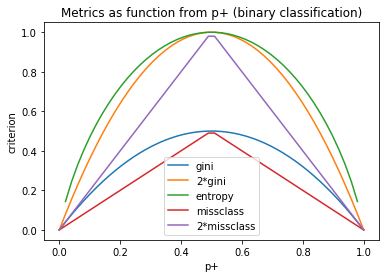

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Metrics as function from p+ (binary classification)')
plt.legend();

In [3]:
# Generate data

# first class
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

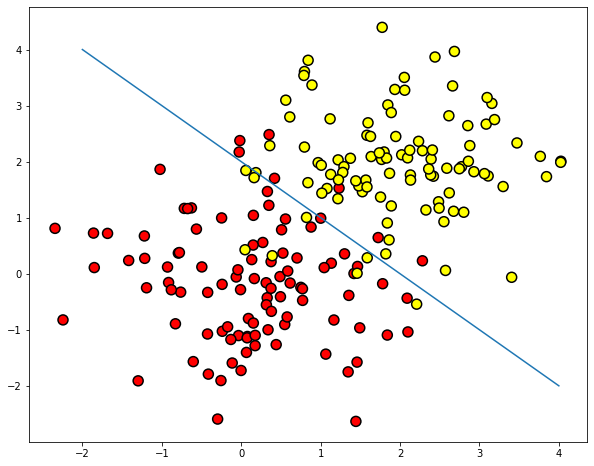

In [4]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1))

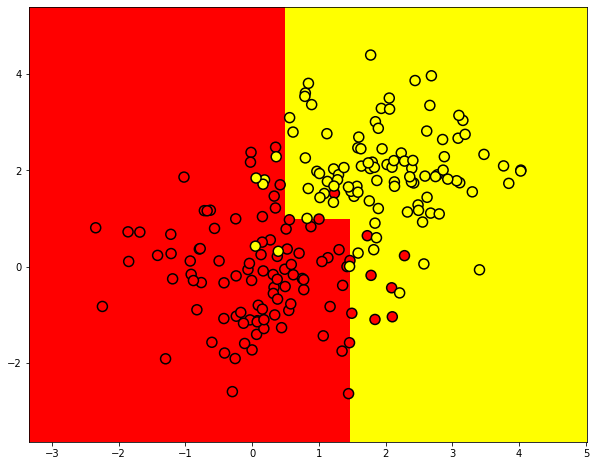

In [5]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=17)

clf_tree.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)

In [6]:
clf_tree.score(train_data, train_labels)

0.925

In [7]:
# Fine tuning

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth':[3, 5, 10], 'min_samples_leaf':[3, 6, 10, 20]},
    {'criterion':['entropy'], 'max_depth':[3, 5, 10], 'min_samples_leaf':[3, 6, 10, 20]}
     ]

clf_tree = DecisionTreeClassifier(random_state=17)

grid_search = GridSearchCV(clf_tree, param_grid, cv=5, scoring='accuracy',
                          return_train_score=True)
     
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [3, 5, 10],
                          'mi

In [8]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

In [9]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [10]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.885 {'max_depth': 3, 'min_samples_leaf': 3}
0.885 {'max_depth': 3, 'min_samples_leaf': 6}
0.865 {'max_depth': 3, 'min_samples_leaf': 10}
0.8549999999999999 {'max_depth': 3, 'min_samples_leaf': 20}
0.9099999999999999 {'max_depth': 5, 'min_samples_leaf': 3}
0.885 {'max_depth': 5, 'min_samples_leaf': 6}
0.865 {'max_depth': 5, 'min_samples_leaf': 10}
0.8549999999999999 {'max_depth': 5, 'min_samples_leaf': 20}
0.885 {'max_depth': 10, 'min_samples_leaf': 3}
0.885 {'max_depth': 10, 'min_samples_leaf': 6}
0.865 {'max_depth': 10, 'min_samples_leaf': 10}
0.8549999999999999 {'max_depth': 10, 'min_samples_leaf': 20}
0.89 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3}
0.875 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6}
0.865 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}
0.8549999999999999 {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20}
0.9 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3}
0.875 {'criterion': 'ent

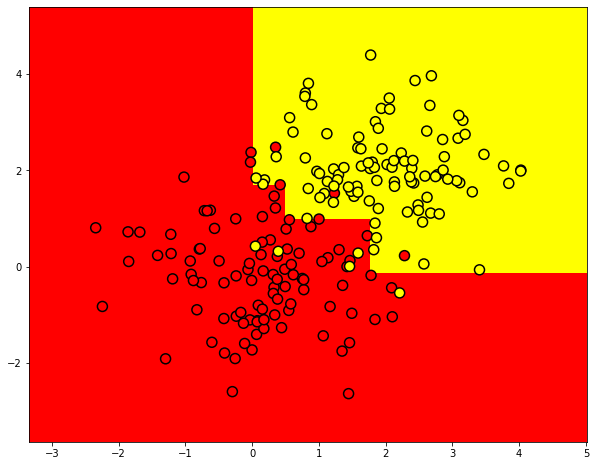

In [11]:
xx, yy = get_grid(train_data)
predicted = grid_search.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)

In [12]:
grid_search.best_estimator_.score(train_data, train_labels)

0.96

In [13]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = [
    {'max_depth':[3, 5, 10], 'min_samples_leaf':[3, 6, 10, 20]},
    {'criterion':['entropy'], 'max_depth':[3, 5, 10], 'min_samples_leaf':[3, 6, 10, 20]}
     ]

clf_tree = DecisionTreeClassifier(random_state=17)

grid_search = GridSearchCV(clf_tree, param_grid, cv=skf, scoring='accuracy',
                          return_train_score=True)
     
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
          

In [14]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3}

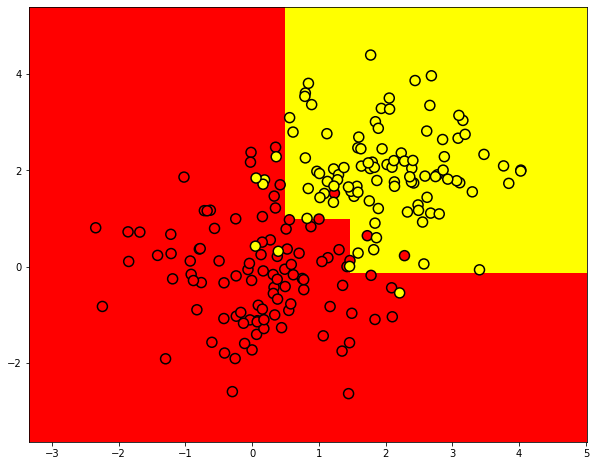

In [15]:
xx, yy = get_grid(train_data)
predicted = grid_search.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)

In [16]:
grid_search.best_estimator_.score(train_data, train_labels)

0.945

In [17]:
grid_search.best_estimator_.feature_importances_

array([0.24229375, 0.75770625])

In [18]:
# Bagging

from sklearn.ensemble import BaggingClassifier

clf_tree_new = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10, random_state=17)

bag_clf = BaggingClassifier(clf_tree_new, n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(train_data, train_labels)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=10,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=17,
 

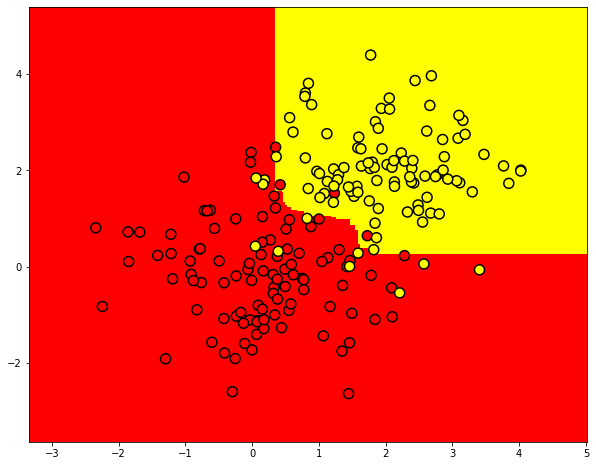

In [19]:
xx, yy = get_grid(train_data)
predicted = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)

In [20]:
bag_clf.oob_score_

0.875

In [21]:
score_bagging_tree = bag_clf.score(train_data, train_labels)
score_bagging_tree

0.93